## Were Titanic's lifeboats allocated equitably?


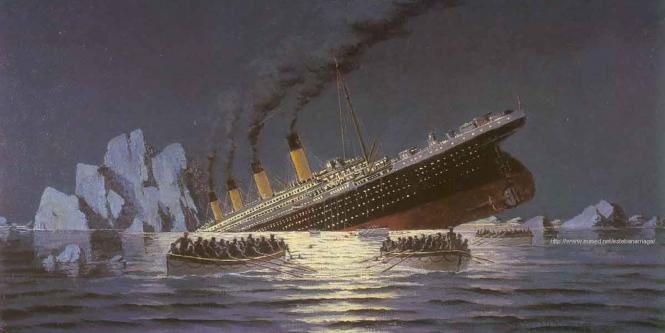

### Context 
Some people believe the lifeboats in the Titanic tragedy was unequal, unlike the well known phrase **women and children first** it's believed that rich had advantage to scape before the rest. 

### Statement 
This time the problem is addressed by an statistical approach, we will test the variables **age** and **sex** vs **survival** to check if there's some kind of relation between them having this way statistical evidence that supports these asumptions. 

In [1]:
# Importing needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sb

# Ignor warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Uploading the dataset
data = sb.load_dataset('titanic')
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
# Selecting useful variables only from previous dataset
variables = ['sex','age','class','alive']
df = data[variables]
df.head()

,sex,age,class,alive
0,male,22.0,Third,no
1,female,38.0,First,yes
2,female,26.0,Third,yes
3,female,35.0,First,yes
4,male,35.0,Third,no


### 1. Data Cleaning

In [4]:
# Lenght of the dirty dataset
print('Numbero of rows:',df.shape[0]) 

# CHeeking if there's nulls per column
df.isnull().sum()

Numbero of rows: 891


sex        0
age      177
class      0
alive      0
dtype: int64

In [5]:
# Dopping nulls values
df = df.dropna(how='any',axis=0)

# Lenght of the clean dataset
print('Number of rows after removing NaNs:',df.shape[0])

Number of rows after removing NaNs: 714


### 2. Exploratory Analysis

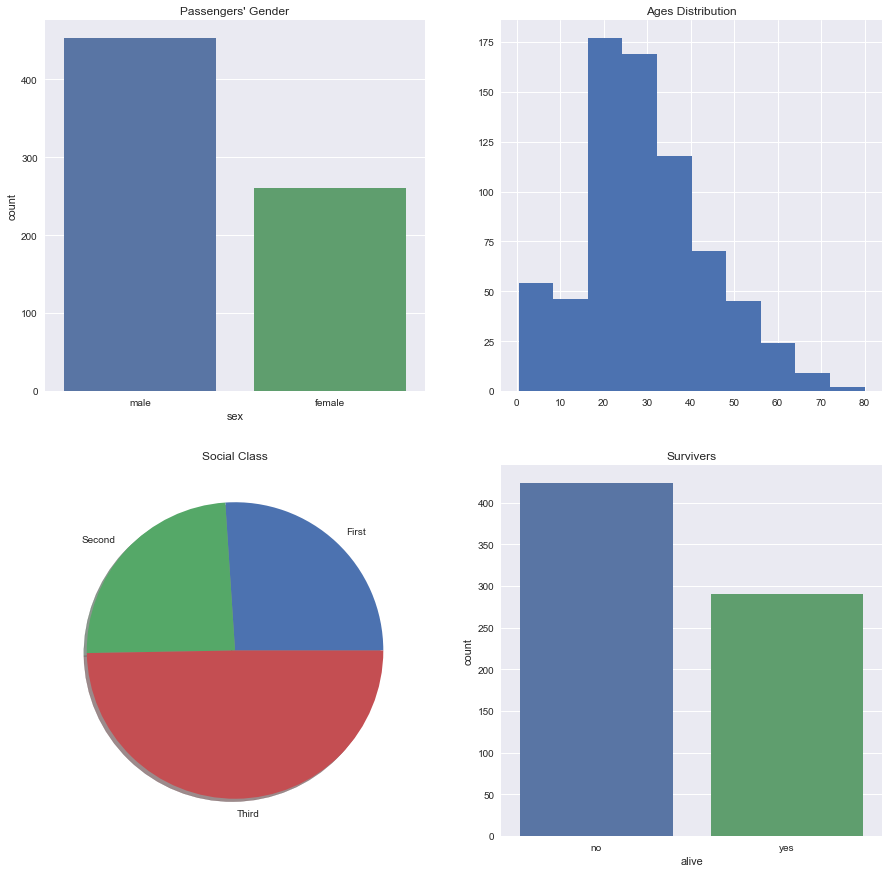

In [6]:
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
sb.countplot('sex', data=df)
plt.title('Passengers\' Gender')

plt.subplot(2,2,2)
plt.hist(df['age'])
plt.title('Ages Distribution')

plt.subplot(2,2,3)
cantidades = df.groupby('class').count().T.sum().tolist()
clase = ['First','Second','Third']
plt.pie(cantidades,labels=clase, shadow=True)
plt.title('Social Class')

plt.subplot(2,2,4)
sb.countplot('alive', data=df)
plt.title('Survivers')

plt.show()

**Observations**

- Most passengers were men
- Most passengers were mid-age adults (~20 y 40 years)
- Most passengers traveled in first class
- Most passengers passed away

### 3. Inequality Study

To find out if there really was injustice in lifeboats allocation, let's break down the initial question as follows:

- Did they really give priority to women at the time of distribution?
- Did they really prioritize children at the time of distribution?
- Did first class have an advantage over the other two?

To answer the first question we must analyze the relationship between the variables "Gender" and "Survival".

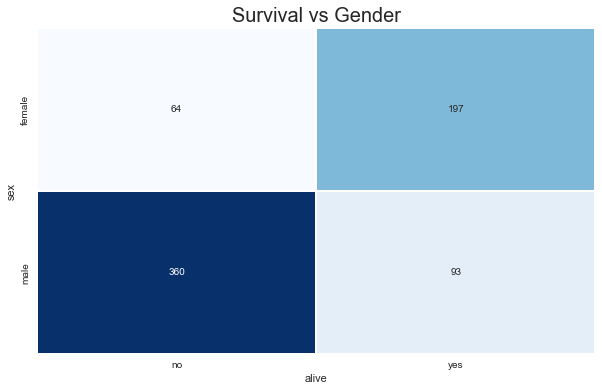

In [13]:
# Let's create the contingency table for the "sex" & "alive" variables.
supervivencia_segun_genero = pd.crosstab(df['sex'],df['alive'])
plt.figure(figsize=(10,6))
sb.heatmap(supervivencia_segun_genero, annot=True, fmt='d',
           cmap='Blues', linewidth=2, cbar=False )
plt.title('Survival vs Gender', size=20)
plt.show()

**Observations**
- 75% of women survived
- 20% of men survived

A higher percentage of women survived the tragedy. Is this proof that there was an unequal distribution according to sex?

That would be equivalent to say that the variables "Sex" and "Alive" are related, however, as these two are categorical variables we cannot scatter them to see their correlations, so we must perform an independence test.

$$
\left\{
\begin{array}{ll}
H_0:\ Passenger's\ survival \ is\ independient\ from\ its\ gender\\ 
H_1:\ Passenger's\ survival \ it's\ up\ to\ its\ gender\\ 
\end{array}
\right.
$$

In [18]:
# We'll use the chi-square test from the scipy library
from scipy.stats import chi2_contingency

contraste = chi2_contingency(supervivencia_segun_genero)

print('p-value =',round(contraste[1],5))
print()
if contraste[1]>0.05:
  print('Since the p-value is greater than the significance level (5%), we accept the null hypothesis.')
  print('The study concludes that the passenger\'s survival doesn\'t depend on its gender')
else:
  print('Since the p-value is less than the significance level (5%), we reject the null hypothesis.')
  print('The study concludes that passengers\' survival it\'s up to its gender ')

p-value = 0.0

Since the p-value is less than the significance level (5%), we reject the null hypothesis.
The study concludes that passengers' survival it's up to its gender 


To answeer the second questions we perform the same test for variables "Age" & "Alive".

In [19]:
# Although the variable "Survival" is categorical, "Age" is numeric. In order to relate them we must split the age by ranges
# For instance:
# - 1) child, adolescent, adult, old man
# - 2) child, adult, old man
# - 3) child, adolescent, adult
# - 4) child, adult

# There are many categories that can be proposed. For the purposes of this analysis we will split according to option 4.
intervalos = [ min(df['age']) , 15 , max(df['age']) ]
categorias = [ 'child', 'adult']
df['type'] = pd.cut(df['age'], bins=intervalos , labels=categorias)
datos = df.drop(['age'], axis=1)

In [20]:
datos.head()

,sex,class,alive,type
0,male,Third,no,adult
1,female,First,yes,adult
2,female,Third,yes,adult
3,female,First,yes,adult
4,male,Third,no,adult


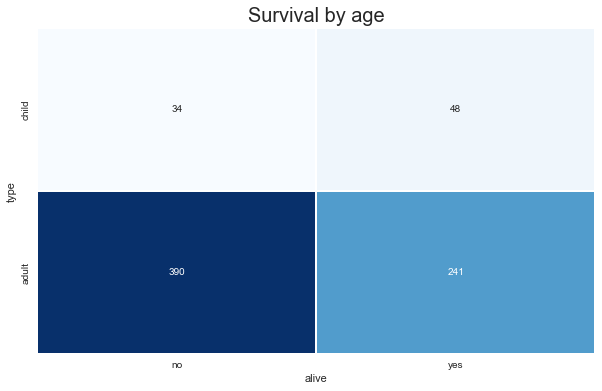

In [21]:
# Ploting the heat map for the variables "alive" and "type"
supervivencia_segun_edad = pd.crosstab(df['type'],df['alive'])
plt.figure(figsize=(10,6))
sb.heatmap(supervivencia_segun_edad, annot=True, fmt='d',
           cmap='Blues', linewidth=2, cbar=False )
plt.title('Survival by age', size=20)
plt.show()

**Observations**
- 38% of adults survived
- 58% of children survived

Note that a higher percentage of children than adults were saved in the Titanic tragedy, however, is this enough evidence to ensure that the famous "children first" dialogue is true?

Let's do test:
$$
\left\{
\begin{array}{ll}
H_0:\ The\ passenger's\ survival \ is\ independient\ from\ its\ age\\ 
H_1:\ The\ passenger's\ survival \ it's\ up\ to\ its\ age\\ 
\end{array}
\right.
$$

In [22]:
contraste = chi2_contingency(supervivencia_segun_edad)

print('p-value:',round(contraste[1],5))
print()
if contraste[1]>0.05:
  print('Since the p-value is greater than the significance level (5%), we accept the null hypothesis.')
  print('The study concludes that the passenger\'s survival doesn\'t depend on its age')
else:
  print('Since the p-value is less than the significance level (5%), we reject the null hypothesis.')
  print('The study concludes that passengers\' survival it\'s up to its age ')

p-value: 0.00065

Since the p-value is less than the significance level (5%), we reject the null hypothesis.
The study concludes that passengers' survival it's up to its age 


Finally, let's answer the question ***did the first class have some kind of advantage?***

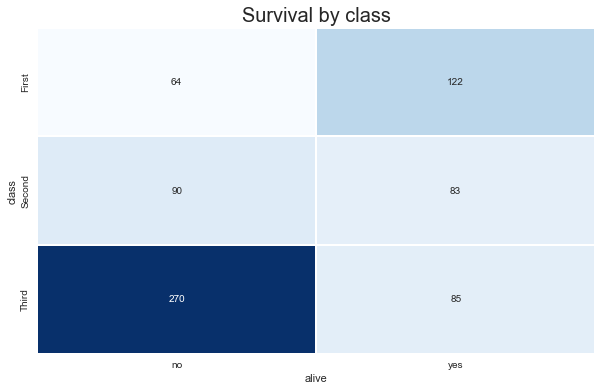

In [23]:
# Heat map for "class" & "alive"
supervivencia_segun_clase = pd.crosstab(df['class'],df['alive'])
plt.figure(figsize=(10,6))
sb.heatmap(supervivencia_segun_clase, annot=True, fmt='d',
           cmap='Blues', linewidth=2, cbar=False )
plt.title('Survival by class', size=20)
plt.show()

**Observations**
- In first class 65% of people were saved
- In second class 48% of people were saved
- In third class 23% of people were saved

From previos data we see both first and second class survival is approximately uniform, however, in third class we see that 77% 
of passengers passed away. 

Is this evidence of injustice? let's do the test:

$$
\left\{
\begin{array}{ll}
H_0:\ The\ passenger's\ survival \ is\ independient\ from\ its\ class\\ 
H_1:\ The\ passenger's\ survival \ it's\ up\ to\ its\ class\\ 
\end{array}
\right.
$$

In [27]:
contraste = chi2_contingency(supervivencia_segun_clase)

print('El p-valor es:',contraste[1])
print()
if contraste[1]>0.05:
  print('Since the p-value is greater than the significance level (5%), we accept the null hypothesis.')
  print('The study concludes that the passenger\'s survival doesn\'t depend on its class')
else:
  print('Since the p-value is less than the significance level (5%), we reject the null hypothesis.')
  print('The study concludes that passengers\' survival it\'s up to its class ')

El p-valor es: 6.709861749756909e-21

Since the p-value is less than the significance level (5%), we reject the null hypothesis.
The study concludes that passengers' survival it's up to its class 


## Results

When testing the variables **Sex**, **Age** and **Class** vs the variable **Survival** we found dependence.

## Conclusion
The tests provide statistical evidente that support the asumptions stated in the beginning, **there was injustice in lifeboat's distribution**.